# CycleGAN and pix2pix in PyTorch

The code was written by Jun-Yan Zhu and Taesung Park, and supported by Tongzhou Wang, based on the paper "Unpaired Image-to-Image Translation
using Cycle-Consistent Adversarial Networks"[https://arxiv.org/pdf/1703.10593.pdf] 

Please take a look at the [repository](https://github.com/mashyko/pytorch-CycleGAN-and-pix2pix/)  https://github.com/mashyko/pytorch-CycleGAN-and-pix2pix/ for more information

このノートブックの詳しい使用法については、こちらのサイトをご覧ください。https://www.koi.mashykom.com/dcgan.html

# Install

In [ ]:
!git clone https://github.com/mashyko/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 2286 (delta 11), reused 0 (delta 0), pack-reused 2227
Receiving objects: 100% (2286/2286), 14.49 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (1449/1449), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 20.0MB/s 
     |████████████████████████████████| 204kB 26.9MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=c2b923cf27580f7afdd538e22f03a2eb1a691dd486766b4b9ece4f9e7bf0fe6e
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=c61a7db63a76f49c16689f943a12f4d32a0cbef228abfb622b808d17d1f2ec69
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2020-03-22 13:41:25--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  93.2MB/s    in 0.5s    

2020-03-22 13:41:25 (93.2 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [ ]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize fake images and real pictures

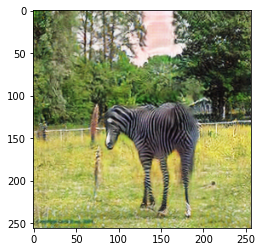

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1030_fake.png')
plt.imshow(img)

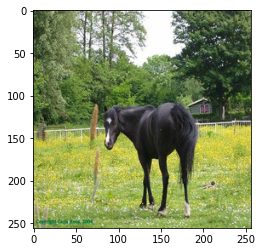

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1030_real.png')
plt.imshow(img)

Monetの画像を浮世絵風に変換

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh monet2photo

In [ ]:
!bash ./scripts/download_cyclegan_model.sh style_ukiyoe

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_ukiyoe]
for details.

--2020-03-22 13:41:52--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  95.4MB/s    in 0.5s    

2020-03-22 13:41:53 (95.4 MB/s) - ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [ ]:
!python test.py --dataroot datasets/monet2photo/testA/ --name style_ukiyoe_pretrained --model test --results_dir ./results/ --no_dropout


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA/   	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

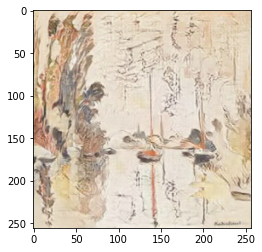

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_ukiyoe_pretrained/test_latest/images/00030_fake.png')
plt.imshow(img)

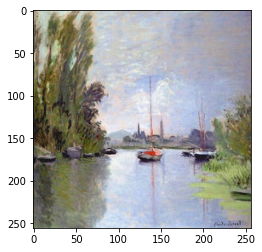

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_ukiyoe_pretrained/test_latest/images/00030_real.png')
plt.imshow(img)

手持ちの写真をゴッホ風絵画に変換
写真を directory /datasets/photo2image/testA/ に配置する。

In [ ]:
!bash ./scripts/download_cyclegan_model.sh style_vangogh

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_vangogh]
for details.

--2020-03-22 13:42:04--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  94.3MB/s    in 0.5s    

2020-03-22 13:42:04 (94.3 MB/s) - ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’ saved [45575747/45575747]



In [ ]:
!python test.py --dataroot datasets/photo2image/testA --name style_vangogh_pretrained --model test --results_dir ./results/ --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/photo2image/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

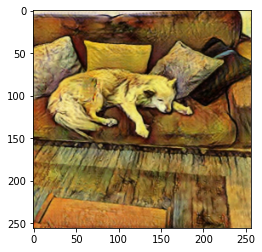

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/20203010_fake.png')
plt.imshow(img)

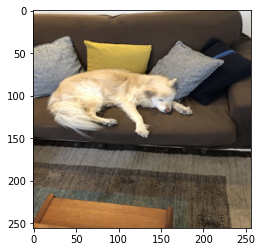

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/20203010_real.png')
plt.imshow(img)

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan

Traceback (most recent call last):
  File "train.py", line 52, in <module>
    model.optimize_parameters()   # calculate loss functions, get gradients, update network weights
  File "/content/pytorch-CycleGAN-and-pix2pix/models/cycle_gan_model.py", line 187, in optimize_parameters
    self.backward_G()             # calculate gradients for G_A and G_B
  File "/content/pytorch-CycleGAN-and-pix2pix/models/cycle_gan_model.py", line 178, in backward_G
    self.loss_G.backward()
  File "/usr/local/lib/python3.6/dist-packages/torch/tensor.py", line 195, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "/usr/local/lib/python3.6/dist-packages/torch/autograd/__init__.py", line 99, in backward
    allow_unreachable=True)  # allow_unreachable flag
KeyboardInterrupt


以上